In [1]:
import numpy as np
import networkx as nx
import tsplib95
import matplotlib.pyplot as plt
import math
import functions as f

In [2]:
filename = "a280.tsp"
problem = tsplib95.load(filename)
G  = problem.get_graph()
layout = nx.spring_layout(G,seed=0)
arr=np.array(G.nodes)
np.random.shuffle(arr)

In [3]:
def get_edge_list(array):
    res=[]

    for i in range(len(array)-1):
        res.append((array[i],array[i+1]))

    res.append((array[-1],array[0]))

    return res

def get_distance(node1, node2):
    return math.dist(node1['coord'],node2['coord'])

def get_fitness(edge_list):
    fitness=0
    for pair in edge_list:
        fitness += get_distance(G.nodes[pair[0]],G.nodes[pair[1]])
    return fitness

# get_distance(G.nodes[2],G.nodes[2])
edge_list = get_edge_list(arr)
get_fitness(edge_list)


33038.62153851957

In [4]:
print(type(arr))
print(get_edge_list([i[0] for i in edge_list]))

<class 'numpy.ndarray'>
[(76, 175), (175, 138), (138, 103), (103, 276), (276, 211), (211, 133), (133, 67), (67, 268), (268, 55), (55, 223), (223, 239), (239, 77), (77, 233), (233, 19), (19, 46), (46, 121), (121, 140), (140, 209), (209, 203), (203, 99), (99, 145), (145, 151), (151, 222), (222, 214), (214, 270), (270, 130), (130, 128), (128, 274), (274, 262), (262, 206), (206, 84), (84, 248), (248, 158), (158, 180), (180, 42), (42, 74), (74, 166), (166, 183), (183, 271), (271, 247), (247, 171), (171, 2), (2, 173), (173, 187), (187, 184), (184, 238), (238, 48), (48, 49), (49, 185), (185, 8), (8, 6), (6, 277), (277, 7), (7, 150), (150, 244), (244, 69), (69, 142), (142, 52), (52, 62), (62, 218), (218, 198), (198, 107), (107, 43), (43, 272), (272, 11), (11, 220), (220, 221), (221, 159), (159, 224), (224, 208), (208, 29), (29, 64), (64, 144), (144, 163), (163, 101), (101, 182), (182, 104), (104, 57), (57, 259), (259, 1), (1, 34), (34, 90), (90, 98), (98, 242), (242, 54), (54, 116), (116, 127)

In [5]:
dictionary = dict()
G.nodes[1]['coord']
for i in range(1,len(G.nodes)+1):
    dictionary[i] = G.nodes[i]['coord']
# print (dictionary)

Optimal path, Fitness: 2586.7696475631606
Closest neighbour path, Fitness: 3224.0854924812074


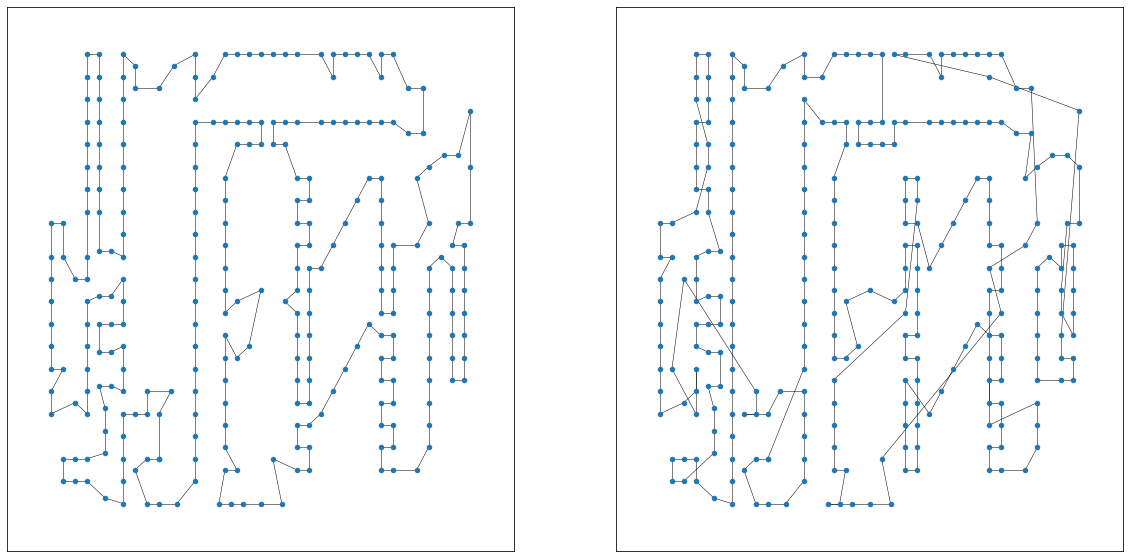

In [17]:
solution = tsplib95.load("a280.opt.tour").tours[0]
solution = get_edge_list(solution)
fig, axs = plt.subplots(1,2, figsize=(20,10))
fit = str(f.get_fitness(G,solution))
print(f"Optimal path, Fitness: " + fit)
nx.draw_networkx(G, pos=dictionary, with_labels=False, node_size=20, edgelist=[], ax=axs[0], label=fit)
nx.draw_networkx_edges(G, pos=dictionary, width=0.5,edgelist=solution, ax=axs[0], label=fit)


path = f.closest_neighbour_alg(G)
fit = str(f.get_fitness(G,f.get_edge_list(path)))
print(f"Closest neighbour path, Fitness: " + fit)
nx.draw_networkx(G, pos=dictionary, with_labels=False, node_size=20, edgelist=[], ax=axs[1], label=fit)
nx.draw_networkx_edges(G, pos=dictionary, width=0.5,edgelist=f.get_edge_list(path), ax=axs[1], label=fit)
plt.show()

In [7]:
p1 = f.generate_random_inividual(G)
p2 = f.generate_random_inividual(G)

child = f.crossover(p1.get_path(), p2.get_path())

f.plot_figure(G, p1.edge_list,name="parent1.jpg")
f.plot_figure(G, p2.edge_list,name="parent2.jpg")
f.plot_figure(G, f.get_edge_list(child),name="child.jpg")


<Figure size 432x288 with 0 Axes>

In [8]:

# 0 not in [2]
# G.nodes[3]

In [9]:
positions1 = nx.get_node_attributes(G,'coord')
positions2 = f.node_positions(G)
try:
    nx.get_edge_attributes(G,'weight')[(2,1)]
except:
    nx.get_edge_attributes(G,'weight')[(1,2)]


In [10]:
gen = f.generate_random_population(G)
print(gen.individuals)
# gen.save_gen()

[<functions.individual object at 0x000001940A3B4A00>, <functions.individual object at 0x000001940A3B44C0>, <functions.individual object at 0x000001940A3B4460>, <functions.individual object at 0x000001940A3B45B0>, <functions.individual object at 0x000001940A3B47C0>, <functions.individual object at 0x000001940A3B48E0>, <functions.individual object at 0x000001940A3B4670>, <functions.individual object at 0x000001940C4EA2E0>, <functions.individual object at 0x000001947935DB20>, <functions.individual object at 0x000001940C4FC340>]


In [11]:
gen = f.load_gen("results/"+filename[:-4]+"_gen_9")


FileNotFoundError: [Errno 2] No such file or directory: 'results/a280_gen_9.pkl'